# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv("sinasc_RO_2019.csv")
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

##### Gráfico de barras em Pandas

<Axes: xlabel='Estado Civil Mãe'>

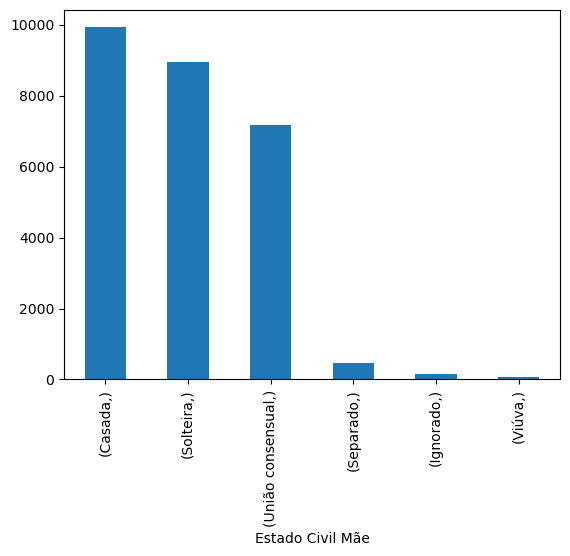

In [3]:
# Com a finalidade de praticar ambas as formas decidi fazer o Gráfico de 1 variável em Pandas
# o restante usando seaborn
est_civ_mae = sinasc[['ESTCIVMAE']]
# Usei a descrição de cada valor em um dicionário 
dict_desc = {1:"Solteira",2:"Casada",3:"Viúva",4:"Separado",5:"União consensual",9:"Ignorado"}
est_civ_mae = est_civ_mae.replace(dict_desc)
est_civ_mae.value_counts().plot.bar(xlabel="Estado Civil Mãe")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

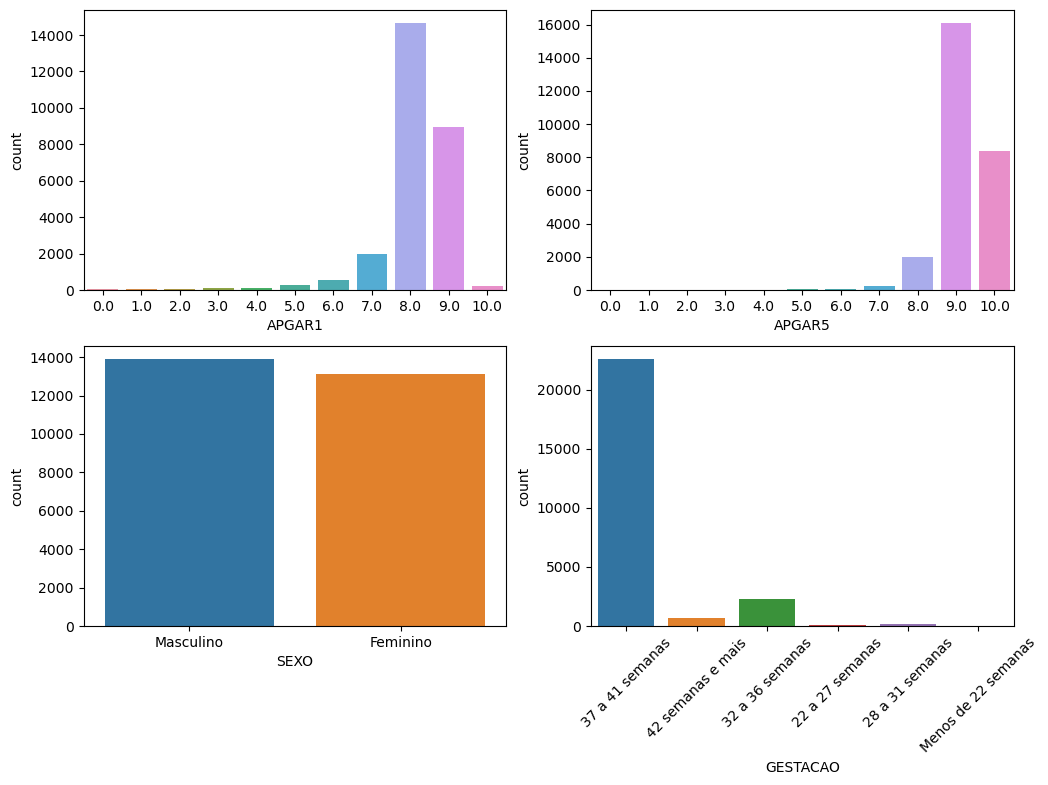

In [99]:
sinasc_1 = sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO']]
plt.rc('figure', figsize=(12, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='APGAR1', data=sinasc_1)
sns.countplot(ax = axes[0, 1], x='APGAR5', data=sinasc_1)
sns.countplot(ax = axes[1, 0], x='SEXO', data=sinasc_1)
sns.countplot(ax = axes[1, 1], x='GESTACAO', data=sinasc_1)

plt.xticks(rotation=45)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [37]:
# Criando um novo índice e fazendo um DataFrame apenas com as variáveis de interesse.
APGAR5_CONSUL_index = {1:"Nenhuma",2:"de 1 a 3", 3:"de 4 a 6", 4: "7 e mais", 9:"Ignorado"}
APGAR5_CONSUL = sinasc[["APGAR5","CONSULTAS"]]

# Fazendo a média analiticamente.
APGAR5_CONSUL = APGAR5_CONSUL.groupby("CONSULTAS")[['APGAR5']].mean()
# Colocando o "novo índice" como coluna e fazendo a coluna anterior ser o novo índice.
# O Objetivo é que aparece no gráfico de forma descritiva o que é cada número.
APGAR5_CONSUL = APGAR5_CONSUL.reset_index()
APGAR5_CONSUL = APGAR5_CONSUL.set_index(APGAR5_CONSUL['CONSULTAS'])
APGAR5_CONSUL = APGAR5_CONSUL.replace(APGAR5_CONSUL_index)
APGAR5_CONSUL

,CONSULTAS,APGAR5
CONSULTAS,,
1,Nenhuma,8.981481
2,de 1 a 3,9.057395
3,de 4 a 6,9.154440
4,7 e mais,9.207188
9,Ignorado,8.860000


[Text(0.5, 1.0, 'Média com barra de erro')]

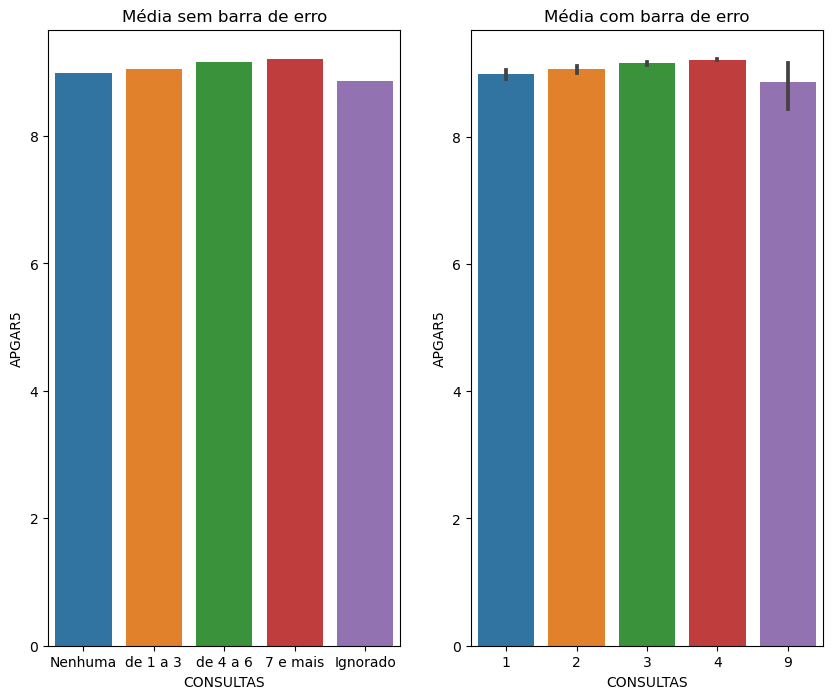

In [54]:
# Finalmente criando o gráfico de barras com a média de APGAR5 por quanntidade de consulta.
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(1,2)
# Gráfico usando a tabela analítica com média já definida.
sns.barplot( ax=axes[0], x='CONSULTAS', y='APGAR5', data=APGAR5_CONSUL).set(title="Média sem barra de erro")
# Gráfico usanndo a média feita pelo barplot com barra de erro.
sns.barplot( ax=axes[1], x='CONSULTAS', y='APGAR5', data=sinasc).set(title="Média com barra de erro")

Text(0.5, 0, 'N° DE CONSULTAS')

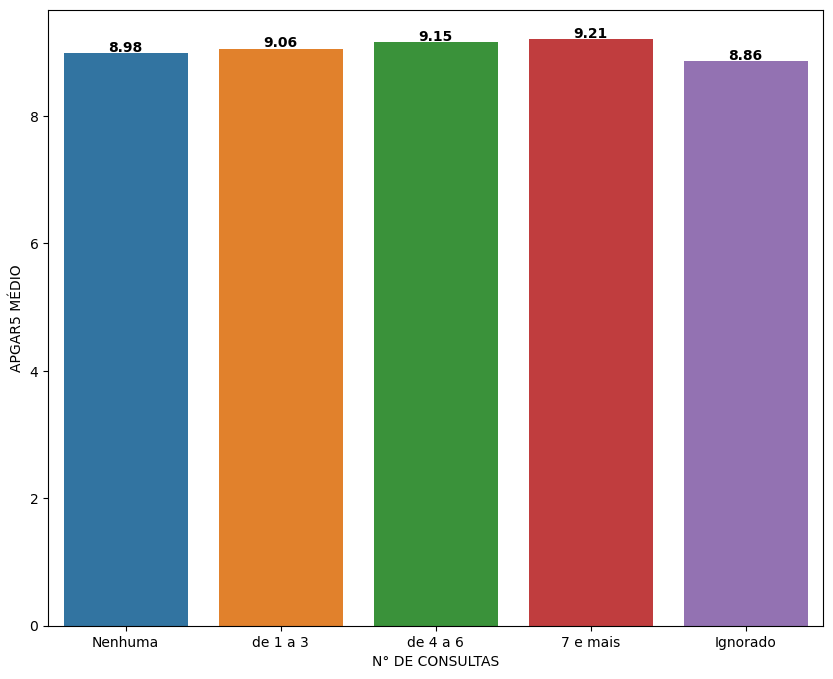

In [98]:
y = APGAR5_CONSUL["APGAR5"]
x = APGAR5_CONSUL["CONSULTAS"]

fig,ax = plt.subplots()
sns.barplot(x='CONSULTAS',y='APGAR5', data= APGAR5_CONSUL)

# Usando e entendendo a função annotate do matplotlib.
for c,i in enumerate(APGAR5_CONSUL_index):
    ax.annotate(
        "{:,.2f}".format(y[i]), # Formatando o valor da média em 2 casas decimais.
        (c, y[i]), # Posição (x,y) da tabela, onde vai ficar o valor.
        ha="center", # Alinha no centro (horizontal) o valor na posição (x,y)
        xytext=(0,1), # Deslocamento x,y do texto
        textcoords="offset points", # Referencial.
        fontsize=10, # Tamanho da fonte.
        fontweight="bold" # Negrito.
    )
ax.set_ylabel("APGAR5 MÉDIO")
ax.set_xlabel("N° DE CONSULTAS")

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

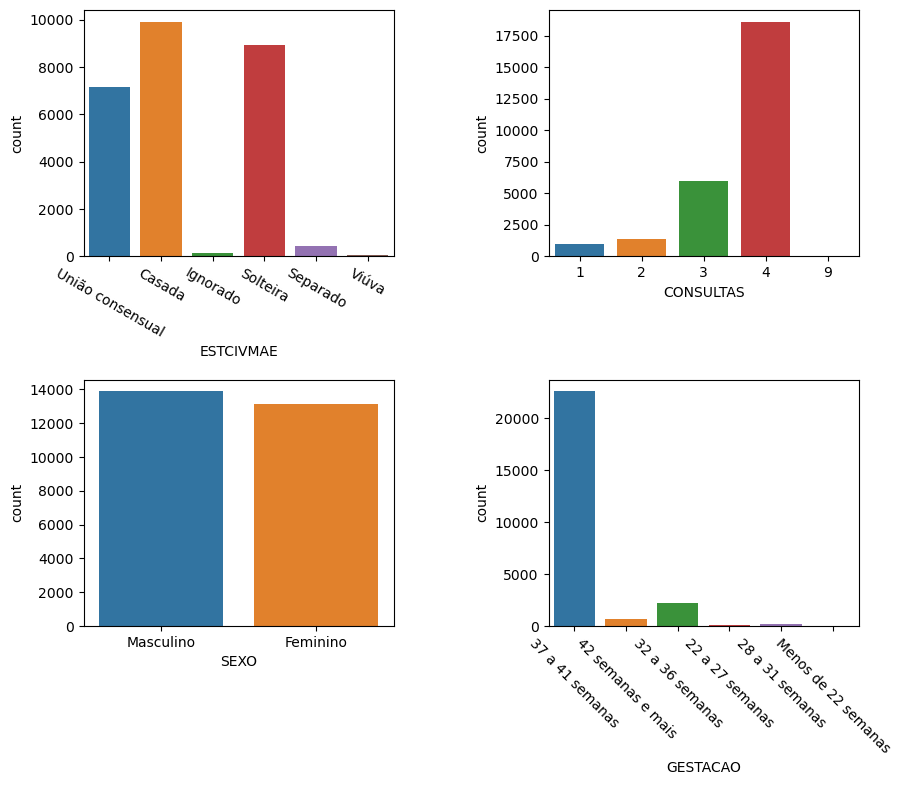

In [39]:
sinasc_2 = sinasc[['CONSULTAS', 'SEXO', 'GESTACAO']]
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)


sns.countplot(ax = axes[0, 0], x='ESTCIVMAE', data=est_civ_mae).tick_params('x',labelrotation=-30)
sns.countplot(ax = axes[0, 1], x='CONSULTAS', data=sinasc_2)
sns.countplot(ax = axes[1, 0], x='SEXO', data=sinasc_2)
sns.countplot(ax = axes[1, 1], x='GESTACAO', data=sinasc_2)

plt.xticks(rotation=-45)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
